In [1]:
import numpy as np
import numpy.ma as ma
from pygeotools.lib import malib, warplib, iolib, geolib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py

In [41]:
from matplotlib import colors
from matplotlib.colors import LogNorm

In [2]:
#importing rasters after warping them through GDAL Warp as masked arrays to common extent
fn1='B-tile-0_shpclip.tif' #DEM Clipped to glacier extent
fn2='WV-Carto.tif' #Elevation Difference Clipped to Glacier extent
ds_list=warplib.memwarp_multi_fn([fn1,fn2],res='max',extent='intersection',t_srs='first', r='cubic')
E=iolib.ds_getma(ds_list[0])
dh_dt=iolib.ds_getma(ds_list[1])


Warping all inputs to the following:
Resolution: 10.0
Extent: [551565.0, 3029605.0, 704093.339, 3115655.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: B-tile-0_shpclip.tif
nl: 8605 ns: 15253 res: 10.000
2 of 2: WV-Carto.tif
nl: 8605 ns: 15253 res: 10.000


In [3]:
common_mask=malib.common_mask([E,dh_dt])

In [5]:
E_masked=ma.array(E,mask=common_mask)
dh_dt_masked=ma.array(dh_dt,mask=common_mask)
ma.shape(E)

(8605, 15253)

In [8]:
ma.count(E_masked)

8868216

In [9]:
ma.count(dh_dt_masked)

8868216

In [102]:
x=ma.compressed(E_masked)
y=ma.compressed(dh_dt_masked)
bin_width=50
 #Define min and max elevation
xmin, xmax= list(malib.calcperc(x, perc=(0.01, 99.99)))
ymin, ymax= list(malib.calcperc(y, perc=(0.01, 99.99)))
#minz = np.floor(minz/bin_width) * bin_width
#maxz = np.ceil(maxz/bin_width) * bin_width
#Compute bin edges and centers
#bin_edges = np.arange(minz, maxz + bin_width, bin_width)
#bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2.0

In [90]:
 #Define min and max elevation
minx, maxx= list(malib.calcperc(E_masked, perc=(0.01, 99.99)))
minx = np.floor(minx/bin_width) * bin_width
maxx = np.ceil(maxx/bin_width) * bin_width
#Compute bin edges and centers
xedges = np.arange(minx, maxx + bin_width, bin_width)
xcenters = bin_edges[:-1] + np.diff(bin_edges)/2.0
 #Define min and max elevation
#miny, maxy= list(malib.calcperc(dh_dt_masked, perc=(0.01, 99.99)))
bin_w=0.02
miny=-5
maxy=+5
miny = np.floor(miny/bin_w) * bin_w
maxy = np.ceil(maxy/bin_w) * bin_w
#Compute bin edges and centers
yedges = np.arange(miny, maxy + bin_w, bin_w)
ycenters = bin_edges[:-1] + np.diff(bin_edges)/2.0


### 2d_histogram_zoomed into +/- 5 m/yr

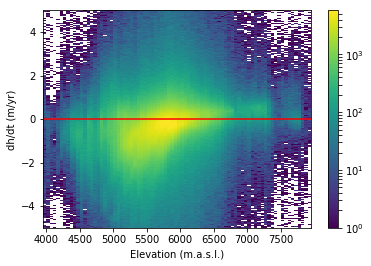

In [98]:
H=plt.hist2d(x,y,bins=[xedges,yedges],range=[[minx, maxx], [miny, maxy]],norm=LogNorm())
extent = [-5, 5, xedges[0], xedges[-1]]
#ax.axhline(y=0, color='r')
plt.axhline(y=0,hold=None,color='r')
plt.xlabel('Elevation (m.a.s.l.)')
plt.ylabel('dh/dt (m/yr)')
plt.colorbar(H[3])
fig = plt.figure()
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#im = ax.imshow(H, cmap=plt.cm.jet, extent=extent, norm=LogNorm())
#fig.colorbar(im, ax=ax)
plt.show()

### 2d_histogram for full dh/dt range

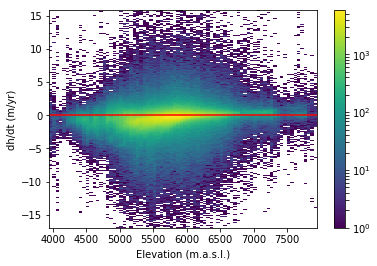

In [101]:
 #Define min and max elevation
minx, maxx= list(malib.calcperc(E_masked, perc=(0.01, 99.99)))
minx = np.floor(minx/bin_width) * bin_width
maxx = np.ceil(maxx/bin_width) * bin_width
#Compute bin edges and centers
xedges = np.arange(minx, maxx + bin_width, bin_width)
xcenters = bin_edges[:-1] + np.diff(bin_edges)/2.0
 #Define min and max elevation
miny, maxy= list(malib.calcperc(dh_dt_masked, perc=(0.01, 99.99)))
#miny=-5
#maxy=+5
miny = np.floor(miny/0.02) * 0.02
maxy = np.ceil(maxy/0.02) * 0.02
#Compute bin edges and centers
yedges = np.arange(miny, maxy + 0.02, 0.02)
ycenters = bin_edges[:-1] + np.diff(bin_edges)/2.0


H=plt.hist2d(x,y,bins=[xedges,yedges],range=[[minx, maxx], [miny, maxy]],norm=LogNorm())
extent = [-5, 5, xedges[0], xedges[-1]]
#ax.axhline(y=0, color='r')
plt.axhline(y=0,hold=None,color='r')
plt.xlabel('Elevation (m.a.s.l.)')
plt.ylabel('dh/dt (m/yr)')
plt.colorbar(H[3])
fig = plt.figure()
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#im = ax.imshow(H, cmap=plt.cm.jet, extent=extent, norm=LogNorm())
#fig.colorbar(im, ax=ax)
plt.show()